x_train shape: (60000, 784) y_train shape: (60000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_15 (Dropout)         (None, 784)               0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_16 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPool

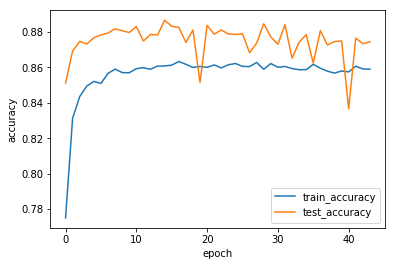

10000/10000 [==============================] - 2s 218us/step


[0.40157343983650207, 0.8689]

In [5]:

import random
import numpy as np
import imutils as im
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
import tensorflow.keras as tf

# Load the fashion-mnist pre-shuffled train data and test data
import mnist_reader

x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
#(x_train, y_train), (x_test, y_test) = tf.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

def modelC(x_train, y_train):
    inputs = Input(shape=(784,))
    x = BatchNormalization()(inputs)
    x = Dropout(0.2)(x)
    x = Reshape((28, 28, 1))(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(loss=tf.losses.categorical_crossentropy,
             optimizer=tf.optimizers.Adadelta(),
             metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, to_categorical(y_train), epochs=44, shuffle=True, validation_split=0.33)
    return history

def showHistory(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
def visualize(testX,testY,model):
    # initialize our list of output images
    images = []
    # initialize the label names
    labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]
    # randomly select a few testing fashion items
    for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
        # classify the clothing
        probs = model.predict(testX[np.newaxis, i])
        prediction = probs.argmax(axis=1)
        label = labelNames[prediction[0]]
 
        # extract the image from the testData if using "channels_first"
        # ordering
        #image = (testX[i][0] * 255).astype("uint8")
 
        # otherwise we are using "channels_last" ordering
        #else:
        image = (testX[i] * 255).astype("uint8")
        # initialize the text label color as green (correct)
        color = (0, 255, 0) 
        # otherwise, the class label prediction is incorrect
        if prediction[0] != np.argmax(testY[i]):
            color = (0, 0, 255)
 
        # merge the channels into one image and resize the image from
        # 28x28 to 96x96 so we can better see it and then draw the
        # predicted label on the image
        image = cv2.merge([image] * 3)
        image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
        cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,color, 2)
 
        # add the image to our list of output images
        images.append(image)
 
    # construct the montage for the images
    montage = im.build_montages(images, (96, 96), (4, 4))[0]
 
    # show the output montage
    cv2.imshow("Fashion MNIST", montage)
    cv2.waitKey(0)
    
history = modelC(x_train, y_train)
showHistory(history)
history.model.evaluate(x_test, to_categorical(y_test))
#visualize(x_train, y_train,testmodel)